# **Predicting hospital readmission of Diabetic Patients**

### NAME: SUVIDYA NP
### ORGANIZATION: ENTRI ELEVATE
### DATE:

## **Overview of Problem Statement:**

#### Hospital readmission is a critical issue in healthcare, especially for diabetic patients who require ongoing management. This project aims to build a machine learning model that predicts whether a diabetic patient will be readmitted to the hospital within 30 days after discharge. A high readmission rate leads to increased hospital costs, patient burden, and resource constraints. By predicting which patients are at a higher risk of readmission, hospitals can take preventive actions to improve patient outcomes and reduce costs.

## **Objective**

#### The objective of this project is to develop a machine learning model that predicts whether a diabetic patient will be readmitted to the hospital within 30 days.

## **Data Description:**
####    - Source: This dataset is from UCI Machine Learning Repository (https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008).
####    - Features: This dataset contains 101766 rows and 50 columns


# **Data Collection:**

In [1]:
#importing libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#loading the dataset:
df=pd.read_csv("C:/Users/suvid/Downloads/diabetic_data.csv")
df.T  #dataframe

,0,1,2,3,4,5,6,7,8,9,...,101756,101757,101758,101759,101760,101761,101762,101763,101764,101765
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738,...,443842070,443842136,443842340,443842778,443847176,443847548,443847782,443854148,443857166,443867222
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939,...,140199494,181593374,120975314,86472243,50375628,100162476,74694222,41088789,31693671,175429310
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,...,Other,Caucasian,Caucasian,Caucasian,AfricanAmerican,AfricanAmerican,AfricanAmerican,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female,...,Female,Female,Female,Male,Female,Male,Female,Male,Female,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100),...,[60-70),[70-80),[80-90),[80-90),[60-70),[70-80),[80-90),[70-80),[80-90),[70-80)
weight,?,?,?,?,?,?,?,?,?,?,...,?,?,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1,2,3,...,1,1,1,1,1,1,1,1,2,1
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3,...,1,1,1,1,1,3,4,1,3,1
admission_source_id,1,7,7,7,7,2,2,7,4,4,...,7,7,7,7,7,7,5,7,7,7
time_in_hospital,1,3,2,2,1,3,4,5,13,12,...,2,5,5,1,6,3,5,1,10,6


In [2]:
df.info()  #to display the summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [3]:
df.shape #for showing columns and rows counts.

(101766, 50)

### ↑ The shape of the dataset is 101766,50 means it has *101766 rows* and *50 columns*.

In [5]:
df.describe() #it will return a table with the statistical measures for numeric columns

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


### ***count*** (Number of non-null values in each column), 
### ***mean*** (Average value), 
### ***std*** (Standard deviation (spread of data)), 
### ***min*** (Minimum value), 
### ***25%*** (1st quartile (25% of data is below this)), 
### ***50%*** (Median (middle value)), 
### ***75%*** (3rd quartile (75% of data is below this)) and 
### ***max*** (Maximum value).

In [11]:
df.isnull().sum() #checking for missing values in each cell of dataframe and counting the total number of missing values of each columns. 

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [13]:
df.nunique() #counting the number of unique values in each column of the DataFrame.

encounter_id                101766
patient_nbr                  71518
race                             6
gender                           3
age                             10
weight                          10
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      18
medical_specialty               73
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         717
diag_2                         749
diag_3                         790
number_diagnoses                16
max_glu_serum                    3
A1Cresult                        3
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride         

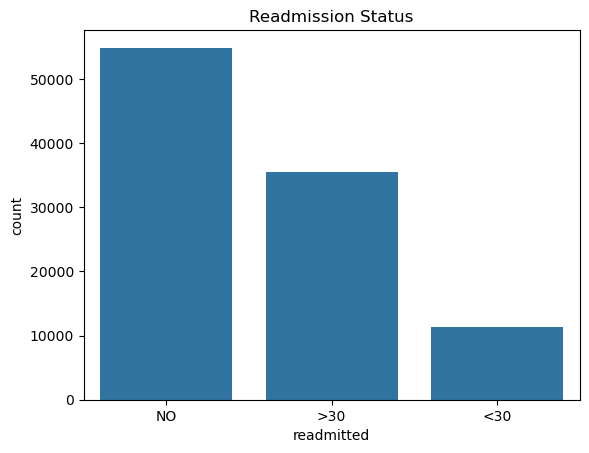

In [15]:
#showing countplot of readmission status:
sns.countplot(x='readmitted',data= df) #creating a countplot for the readmitted column
plt.title("Readmission Status") #giving title
plt.show() #to display

### Showing how many patients were ***readmitted*** and ***not readmitted***.
###  ***NO*** - not readmitted
### ***<30*** - Readmitted within 30 days
### ***>30*** - Readmitted after 30 days

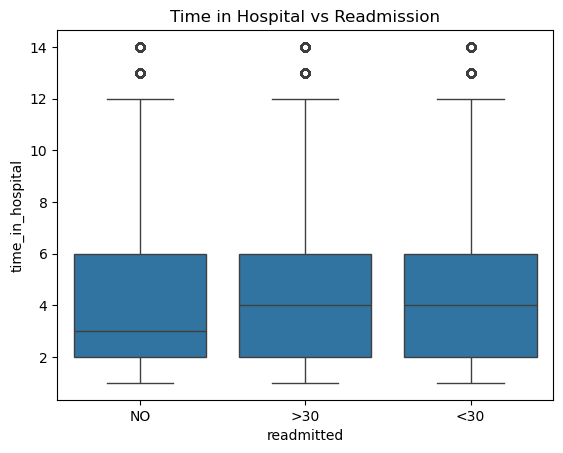

In [18]:
#showing boxplot of time in hospital vs readmission:
sns.boxplot(x='readmitted',y='time_in_hospital',data=df)
plt.title("Time in Hospital vs Readmission") #giving title
plt.show() #to display

### It is helping to compare how long patients stay in the hospital based on their readmission status.
### ***x-axis*** represents different readmission categories. e.g., *NO*, *<30*, *>30*
### ***y-axis*** represents "time_in_hospital" (length of stay in days).

--------------------------------------------------------------------------------------------------------------------------------------------------------

# **Data Preprocessing - Data Cleaning:**

### ***Data cleaning*** is an essential step in preparing data for analysis. Raw data often comes with mistakes, missing information, and inconsistencies, which can lead to inaccurate results in machine learning models. By cleaning the data, we make sure it's accurate, consistent, and reliable, setting the foundation for meaningful insights and better predictions.

In [24]:
#checking for duplicate rows in the dataframe:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
101761    False
101762    False
101763    False
101764    False
101765    False
Length: 101766, dtype: bool

### ***True*** - The row is a duplicate of a previous row.
### ***False*** - The row is unique.

In [27]:
if not df.duplicated().any():
    print("There are no duplicate values")
else:
    print("Duplicate values found")

There are no duplicate values


In [29]:
#checking for missing values:
missing_values=df.isnull().sum()
missing_values=missing_values[missing_values>0]    #showing only columns which has missing values
print(missing_values)

max_glu_serum    96420
A1Cresult        84748
dtype: int64


### ↑ Columns ***max_glu_serum*** has 96420 missing values and ***A1Cresult*** has 84748 missing values.

In [32]:
#dropping coulmns with missing values:
df.drop(columns=['max_glu_serum','A1Cresult'],inplace=True)

### ↑ Both columns missing more than ***80%*** of values.

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


In [37]:
df.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,?,?,?,?,?
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


In [39]:
df.tail().T

,101761,101762,101763,101764,101765
encounter_id,443847548,443847782,443854148,443857166,443867222
patient_nbr,100162476,74694222,41088789,31693671,175429310
race,AfricanAmerican,AfricanAmerican,Caucasian,Caucasian,Caucasian
gender,Male,Female,Male,Female,Male
age,[70-80),[80-90),[70-80),[80-90),[70-80)
weight,?,?,?,?,?
admission_type_id,1,1,1,2,1
discharge_disposition_id,3,4,1,3,1
admission_source_id,7,5,7,7,7
time_in_hospital,3,5,1,10,6


In [41]:
df1=df.copy()  #creating a backup of original dataframe

### ↑ Creating ***copy of df*** to make changes and evaluation.

In [44]:
num_cols=df1.select_dtypes(include=['number']).columns.tolist()

### ↑ It selects all columns from the dataframe ***df1*** that have numeric data types like int64 and float64.
### The ***boxplot function works only with numerical data***, so we need to extract only numeric columns.

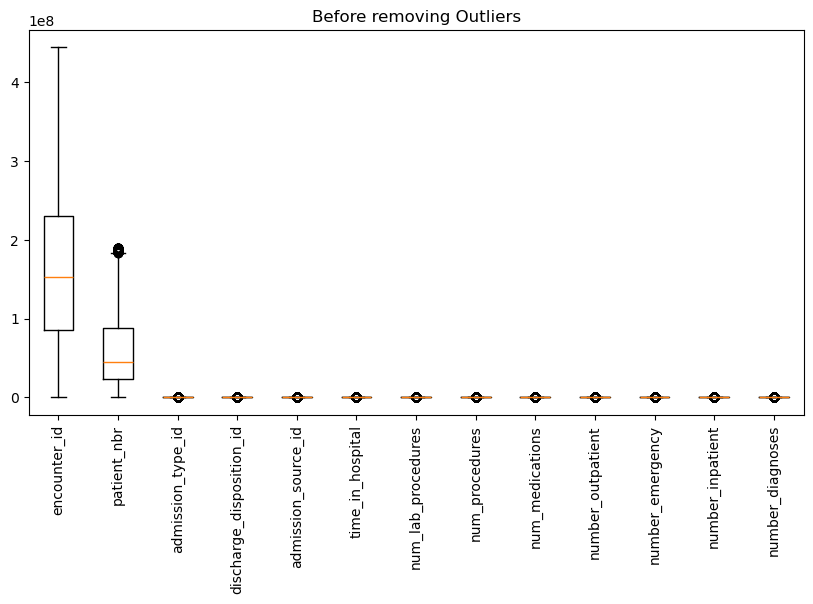

In [47]:
#checking for ouliers, visualisation befor removing outliers:

plt.figure(figsize=(10,5)) #setting figure size
plt.boxplot([df1[col].dropna().values for col in num_cols],labels=num_cols) #to extract values from each numerical column while dropping missing values 
plt.xticks(rotation=90) #to rotate x-axis labels for readability
plt.title("Before removing Outliers") #giving title
plt.show() #to display

## **Outlier**
### An outlier is a value that doesn’t fit in with the rest of the data in a dataset. it’s either ***much higher*** or ***much lower*** than what we’d expect. This can happen for many reasons, like a mistake in data entry, an error in measurement, or just natural variations in the data. If we don’t handle outliers properly, they can throw off our analysis and make our model less accurate.

## **IQR Method** for Detecting Outliers
### The ***Interquartile Range (IQR)*** method is a simple way to spot unusual values (outliers) in a dataset. Instead of looking at the entire range of numbers, it focuses on the middle portion, where most of the data is expected to be.

In [51]:
#removing outliers using IQR Method:
def remove_outliers(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    df=df[(df[column]>=lower_bound) & (df[column]<=upper_bound)]
    return df

#outlier removing for numerical features:
for col in num_cols:
    df=remove_outliers(df,col)

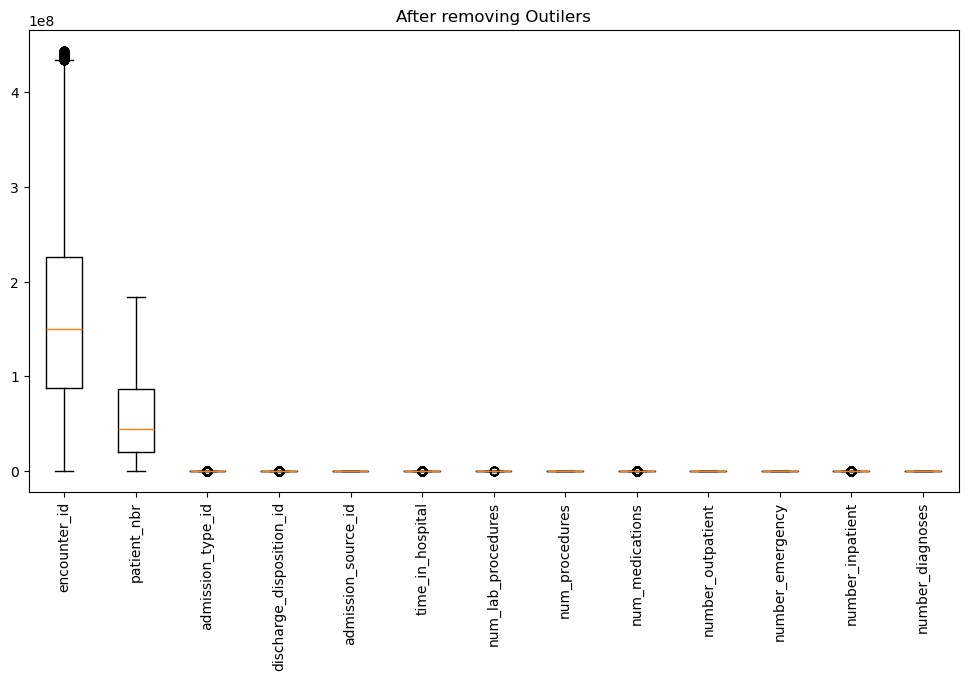

In [53]:
#visualisation after removing outliers:
plt.figure(figsize=(12,6))
plt.boxplot([df[col].dropna().values for col in num_cols],labels=num_cols)
plt.xticks(rotation=90)
plt.title("After removing Outilers")
plt.show()

## **Handling Outliers**

### Even after applying the IQR method to remove outliers, we still see some outliers in the dataset. Instead of removing them completely, we’ll use ***capping (Winsorization)***. This ensures that keeping our data balanced while making sure we don’t lose any valuable insights.

## **Capping**
### Capping is a way to handle extreme values without completely removing them. Instead of removing outliers, ***we adjust them to an acceptable range so they don’t affect our analysis***.

### If a value is ***too low*** (below the lower limit), we push it up to the lower limit.
### If a value is ***too high*** (above the upper limit), we bring it down to the upper limit.
### This method keeps our data within a reasonable range while still maintaining its overall pattern and meaning.

In [57]:
#to cap outliers based on IQR:
def cap_outliers(df, column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_cap=Q1-1.5*IQR #defining lower cap
    upper_cap=Q3+1.5*IQR #defining upper cap
    df[column]=np.where(df[column]<lower_cap,lower_cap,df[column]) #applying capping
    df[column]=np.where(df[column]>upper_cap,upper_cap,df[column]) #applying capping
    return df

#list of numerical columns to apply capping:
columns_to_cap=['encounter_id','admission_type_id','discharge_disposition_id','time_in_hospital','num_lab_procedures','num_medications','number_inpatient']

#applying capping to all selected columns:
for col in columns_to_cap:
    cap_outliers(df,col)

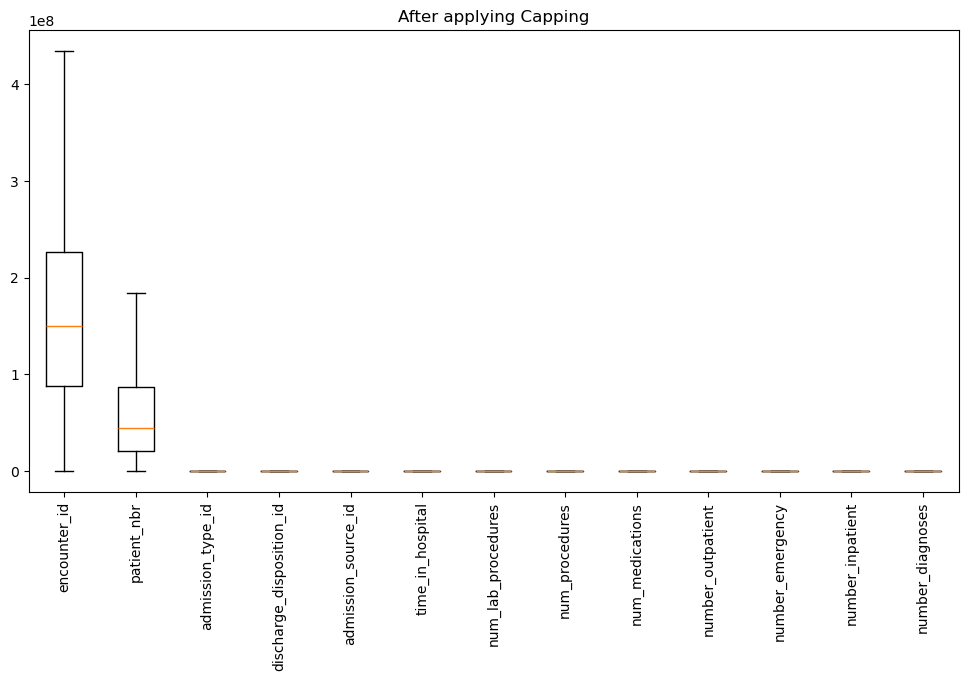

In [59]:
#visualisation after applying capping:
plt.figure(figsize=(12,6))
plt.boxplot([df[col].dropna().values for col in num_cols],labels=num_cols)
plt.xticks(rotation=90)
plt.title("After applying Capping")
plt.show()

## **Skewness**
### Skewness tells us how ***balanced or imbalanced*** our data distribution is. *Symmetrical data* is balanced on both sides, which means values are evenly distributed on both sides of the center. However, in many datasets, values often lean ***left or right*** which creates skewness.



### ***Zero Skewness (Normal Distribution)***: Data is evenly spread, forming a bell-shaped curve.
### ***Positive Skew (Right-Skewed)***: The right tail is longer, meaning most values are clustered on the left, but a few extreme values pull the mean to the right. 
### ***Negative Skew (Left-Skewed)***: The left tail is longer, meaning most values are on the right, but a few very low values pull the mean to the left.

In [62]:
#checking skeweness for all numerical columns:
df[num_cols].skew()

encounter_id                0.724073
patient_nbr                 0.491953
admission_type_id           0.791061
discharge_disposition_id    1.520416
admission_source_id        -0.693068
time_in_hospital            0.772179
num_lab_procedures         -0.377673
num_procedures              1.223965
num_medications             0.431630
number_outpatient           0.000000
number_emergency            0.000000
number_inpatient            0.000000
number_diagnoses           -0.730081
dtype: float64

### **0** - *Symmetrical* (Normal Distribution)
### **> 0** - *Right-Skewed* (Positive Skew)
### **< 0** - *Left-Skewed* (Negative Skew)

## Understanding the Skewness Values
### **Skewness = 0** - Data is symmetrical (normal distribution)
### **Skewness > 1 or < -1** - Data is highly skewed (needs transformation)
### **Moderate Skewness (-1 to -0.5 or 0.5 to 1)*** - May or may not need transformation

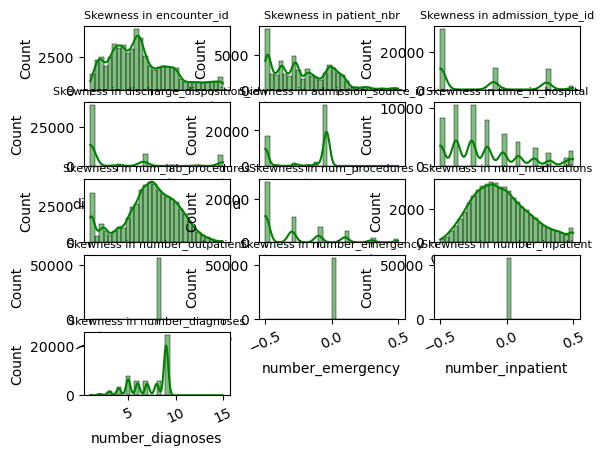

<Figure size 1800x500 with 0 Axes>

In [66]:
#visualising Skewness: 
import math #providing mathematical functions

num_plots=len(num_cols) #calculating how many numerical columns exist in the dataset and determining how many histograms (plots) need to be created
cols=3  #setting fixed number of columns(visual structure is consistent and easy to read)
rows=math.ceil(num_plots/cols)  #calculating the number of rows required for subplots
                                #"num_plots / cols" calculates how many rows are needed for the given number of columns, 
                                #"math.ceil()" rounds up to the nearest whole number.

for i, col in enumerate(num_cols,1): #looping through each numerical column in num_cols, with i as the index (starting from 1). 
                                     #so,it allows us to create multiple histograms dynamically, 
                                     #so,no need to manually write separate plot commands for each column.
    plt.subplot(rows,cols,i)  #creating subplots
    sns.histplot(df[col],bins=30,kde=True,color="green")
    plt.title(f"Skewness in {col}", fontsize=8)
    plt.xticks(rotation=25) #it rotates x-axis labels by 25 degrees(for readability)
plt.figure(figsize=(18,5))
plt.tight_layout()
plt.show()

## **Handling Skewness**
### When data is too skewed, it can mess up analysis and affect model performance. 
### *To fix skewness*:
### 1. ***Log Transformation***: For highly right-skewed data.
### 2. ***Square Root Transformation***: For moderately right-skewed data.
### 3. ***Cube Root Transformation***: For extremely skewed data (both directions).
### 4. ***Box-Cox Transformation***: For data that isn’t strictly positive-skewed.
### 5. ***Capping Outliers(Winsorization)***: For data with extreme outliers.

In [69]:
#finding highly skewed columns:
skewed_cols=df[num_cols].skew()   #calcuating skewness for numerical columns
skewed_cols=skewed_cols[abs(skewed_cols)>0.5]  #filtering highly skewed columns
print(skewed_cols)

encounter_id                0.724073
admission_type_id           0.791061
discharge_disposition_id    1.520416
admission_source_id        -0.693068
time_in_hospital            0.772179
num_procedures              1.223965
number_diagnoses           -0.730081
dtype: float64


In [71]:
#fixing skewness(transformation):
for col in skewed_cols.index: #looping goes through each column name one by one and "skewed_cols.index" contains the names of highly skewed columns. 
        df[col]=np.cbrt(df[col]) #cube root for negative values

print(df[skewed_cols.index].skew())

encounter_id               -0.396142
admission_type_id           0.621148
discharge_disposition_id    1.236791
admission_source_id        -0.750830
time_in_hospital            0.083361
num_procedures              0.204434
number_diagnoses           -1.190211
dtype: float64


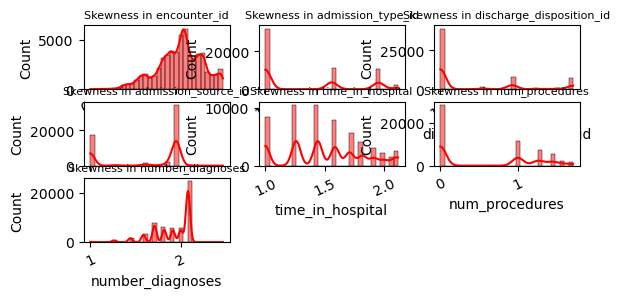

<Figure size 1800x500 with 0 Axes>

In [73]:
#visualising after fixing skewness:
for i, col in enumerate(skewed_cols.index,1): #looping through each numerical column in num_cols, with i as the index (starting from 1). 
    plt.subplot(rows,cols,i)  #creating subplots
    sns.histplot(df[col],bins=30,kde=True,color="Red")
    plt.title(f"Skewness in {col}", fontsize=8)
    plt.xticks(rotation=25) #it rotates x-axis labels by 25 degrees(for readability)
plt.figure(figsize=(18,5))
plt.tight_layout()
plt.show()

## Description:
### Looking at the histograms and KDE plots, the skewness has reduced to some extent, but some features still show signs of skewness, such as *discharge_disposition_id*, *num_procedures*, and *number_diagnoses*.

In [75]:
#log transformation:
for col in['discharge_disposition_id','number_diagnoses','admission_source_id']:  
    if df[col].min()>0:  
        df[col]=np.log1p(df[col])  # log1p avoids log(0)
print(df[skewed_cols.index].skew())

encounter_id               -0.396142
admission_type_id           0.621148
discharge_disposition_id    1.165429
admission_source_id        -0.765891
time_in_hospital            0.083361
num_procedures              0.204434
number_diagnoses           -1.415350
dtype: float64


### Showing small improvement for ***discharge_disposition_id*** from *1.236791* to *1.165429*.

In [79]:
#boxcox and yeojohnson transformation:
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

for col in['discharge_disposition_id','number_diagnoses','admission_source_id']:  
    if df[col].min()>0:  
        df[col], _ = boxcox(df[col] + 1)   #Box-Cox only works for positive values
    else:
        pt = PowerTransformer(method='yeo-johnson') #Yeo-Johnson handles both positive and negative values
        df[col] = pt.fit_transform(df[[col]])

# Checking skewness after transformation
print(df[skewed_cols.index].skew())

encounter_id               -0.396142
admission_type_id           0.621148
discharge_disposition_id    0.855014
admission_source_id        -0.676705
time_in_hospital            0.083361
num_procedures              0.204434
number_diagnoses           -0.351102
dtype: float64


## Improvements After Latest Transformation:
### ***discharge_disposition_id*** reduced from 1.165429 to 0.855014.
### ***number_diagnoses*** significantly reduced from -1.415350 to -0.351102.
### ***admission_source_id*** improved slightly from -0.765891 to -0.676705.

In [82]:
#boxcox and yeojohnson transformation:
for col in['discharge_disposition_id','admission_source_id']:  
    if df[col].min()>0:  
        df[col], _ = boxcox(df[col] + 1)   #Box-Cox only works for positive values
    else:
        pt = PowerTransformer(method='yeo-johnson') #Yeo-Johnson handles both positive and negative values
        df[col] = pt.fit_transform(df[[col]])

# Checking skewness after transformation
print(df[skewed_cols.index].skew())

encounter_id               -0.396142
admission_type_id           0.621148
discharge_disposition_id    0.000000
admission_source_id        -0.675519
time_in_hospital            0.083361
num_procedures              0.204434
number_diagnoses           -0.351102
dtype: float64


## Improvements After Latest Transformation:
### ***discharge_disposition_id*** reduced from 0.855014 to 0.000000, which is now perfectly symmetrical.

In [85]:
#yeojohnson transformation:
pt = PowerTransformer(method='yeo-johnson') #Yeo-Johnson handles both positive and negative values
df['admission_source_id'] = pt.fit_transform(df[['admission_source_id']])
# Checking skewness after transformation
print(df[skewed_cols.index].skew())

encounter_id               -0.396142
admission_type_id           0.621148
discharge_disposition_id    0.000000
admission_source_id        -0.675506
time_in_hospital            0.083361
num_procedures              0.204434
number_diagnoses           -0.351102
dtype: float64


In [87]:
#yeojohnson transformation:
pt = PowerTransformer(method='yeo-johnson')
df['admission_source_id'] = pt.fit_transform(df[['admission_source_id']])
# Checking skewness after transformation
print(df[skewed_cols.index].skew())

encounter_id               -0.396142
admission_type_id           0.621148
discharge_disposition_id    0.000000
admission_source_id        -0.288523
time_in_hospital            0.083361
num_procedures              0.204434
number_diagnoses           -0.351102
dtype: float64


## Improvements After Latest Transformation:
### ***admission_source_id*** is reduced to -0.288523, which is in acceptable range.

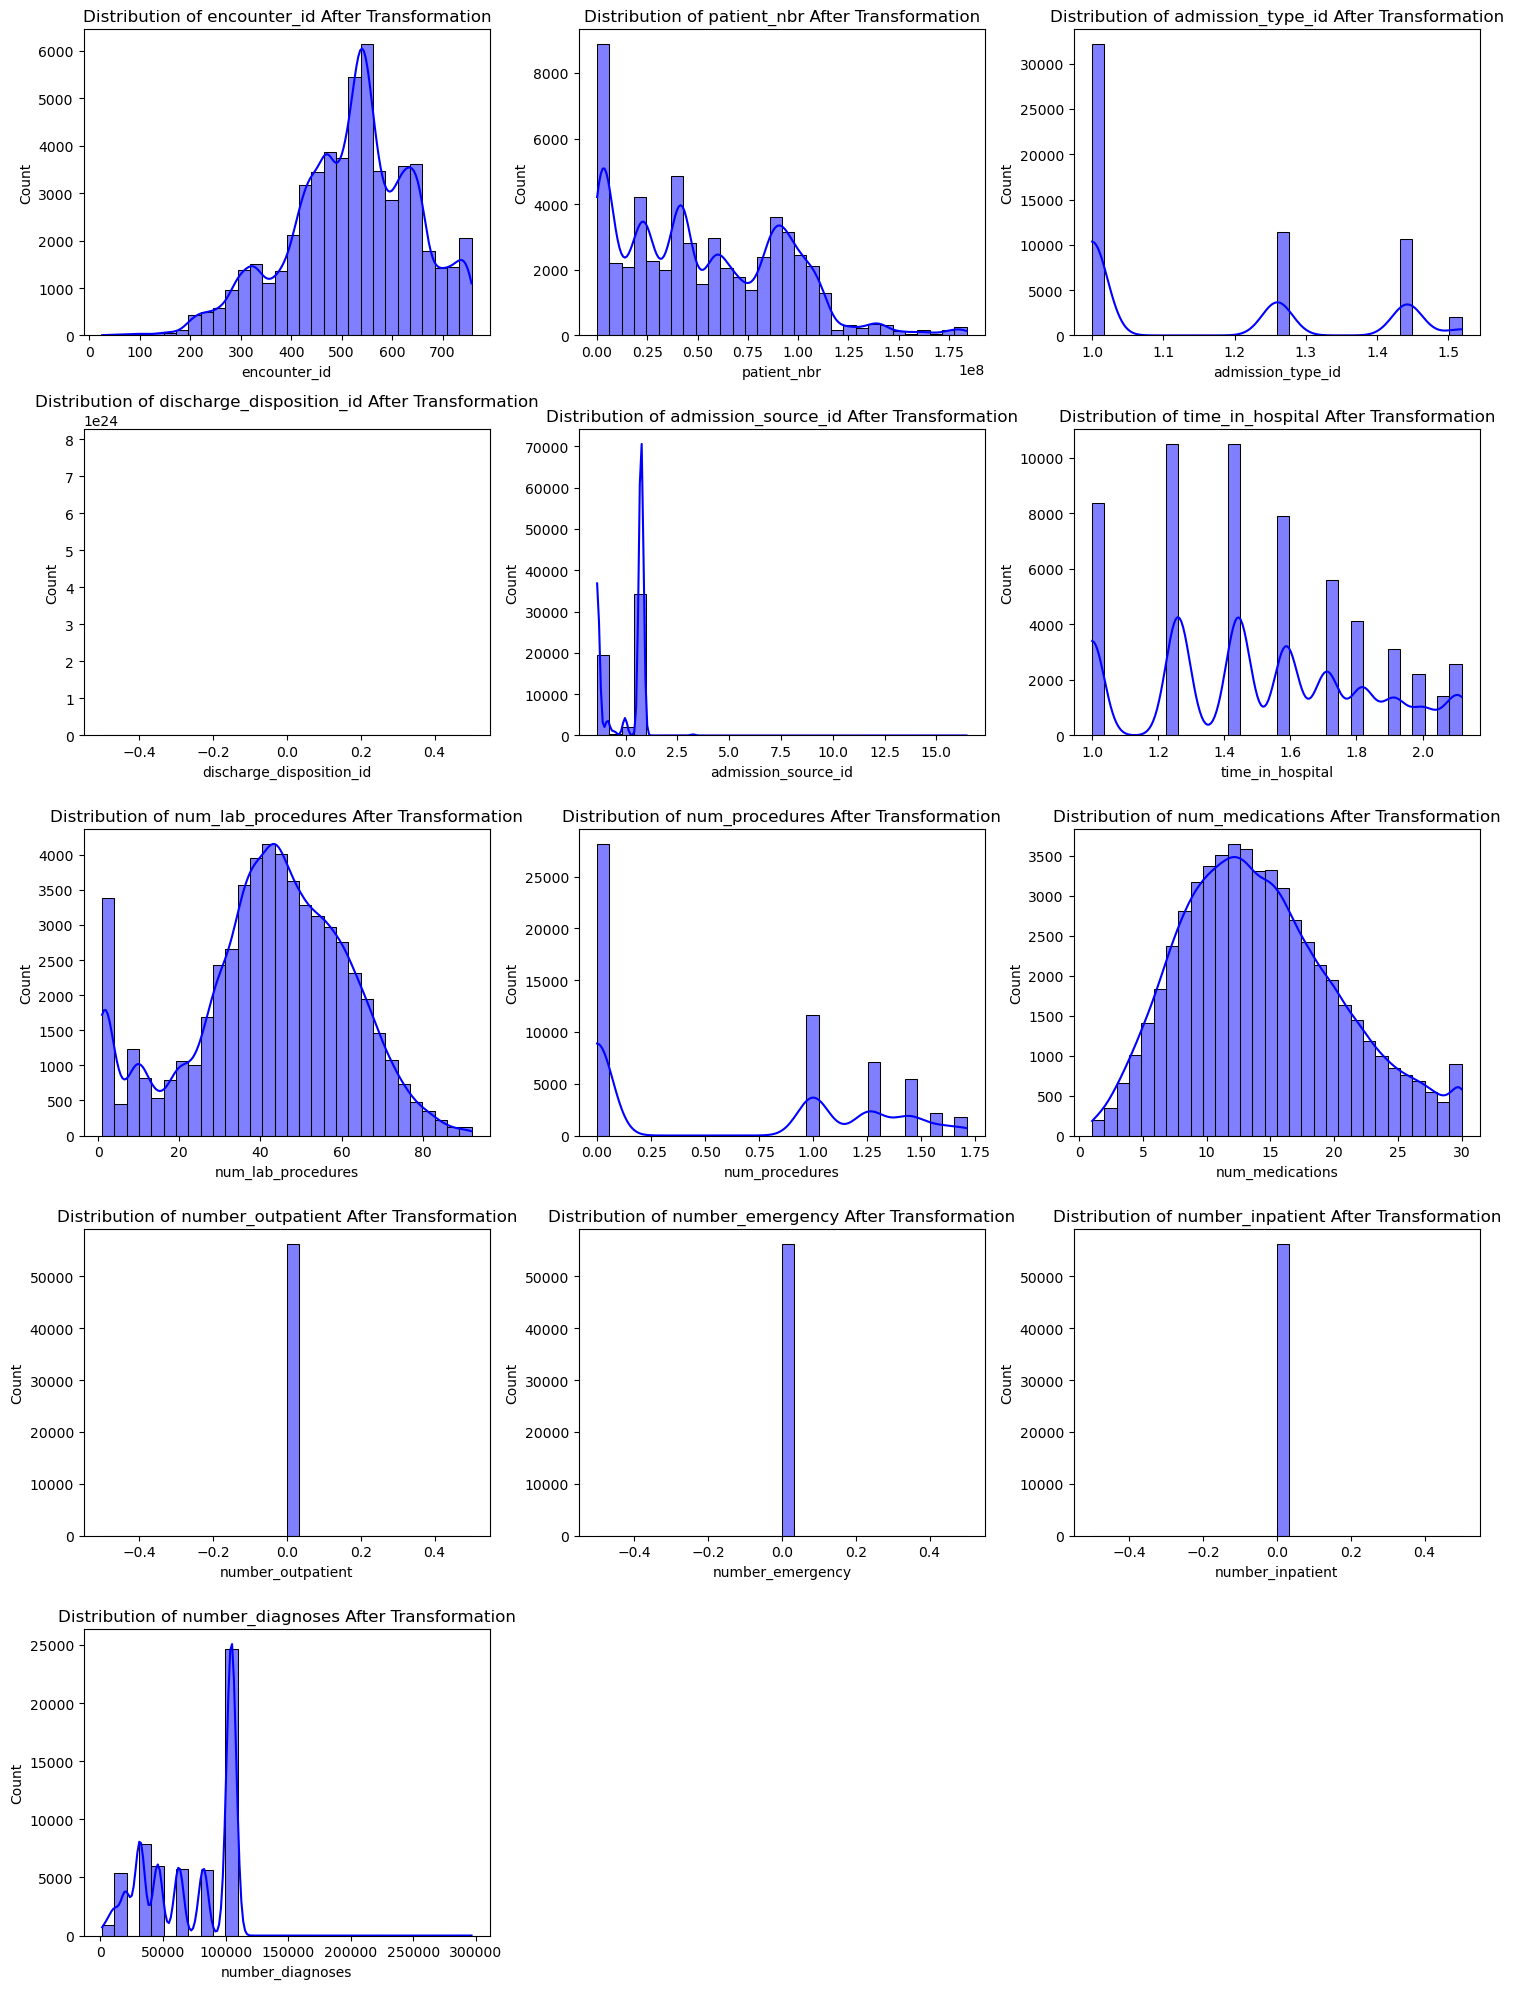

In [90]:
#visualising:
plt.figure(figsize=(15,rows*4))

for i, col in enumerate(num_cols,1):
    plt.subplot(rows,cols,i)  
    sns.histplot(df[col],bins=30,kde=True,color="blue")  
    plt.title(f"Distribution of {col} After Transformation")

plt.tight_layout()
plt.show()

In [91]:
#showing skewness of all numerical columns:
updated_skewness = df.select_dtypes(include=['number']).skew()
print(updated_skewness)

encounter_id               -0.396142
patient_nbr                 0.491953
admission_type_id           0.621148
discharge_disposition_id    0.000000
admission_source_id        -0.288523
time_in_hospital            0.083361
num_lab_procedures         -0.377673
num_procedures              0.204434
num_medications             0.431630
number_outpatient           0.000000
number_emergency            0.000000
number_inpatient            0.000000
number_diagnoses           -0.351102
dtype: float64


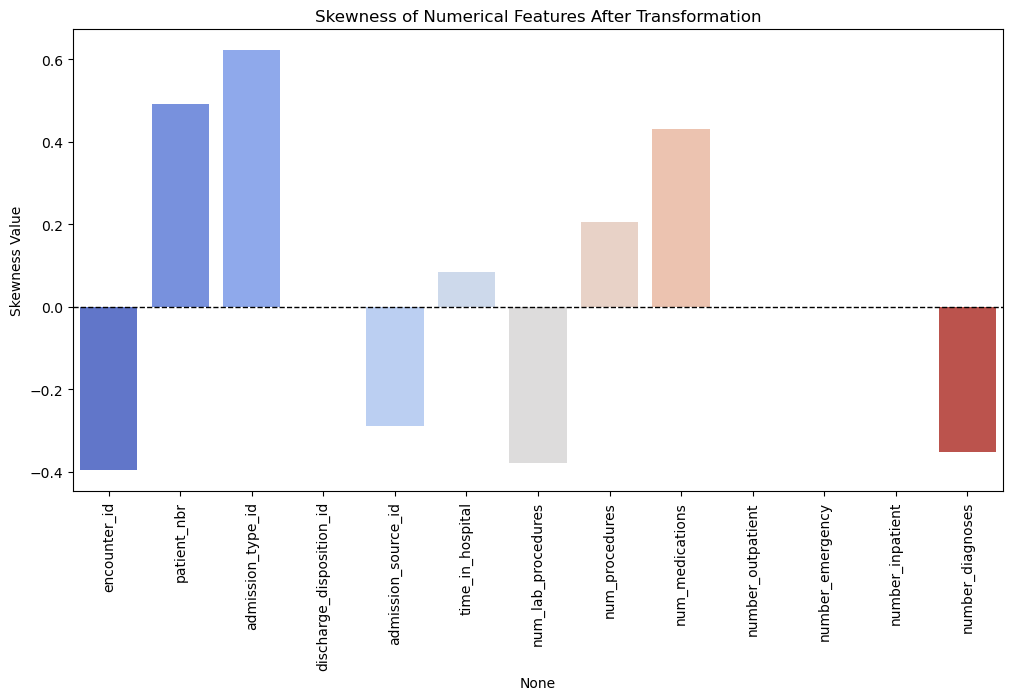

In [92]:
# Convert Series to DataFrame for visualization
df_skewness = pd.DataFrame(updated_skewness, columns=['Skewness'])

#visualising all nuerical columns:
plt.figure(figsize=(12,6))
sns.barplot(x=df_skewness.index,y=df_skewness['Skewness'],hue=df_skewness.index,palette='coolwarm',legend=False)
plt.xticks(rotation=90)
plt.axhline(0,color='black',linestyle='dashed',linewidth=1)
plt.title("Skewness of Numerical Features After Transformation")
plt.ylabel("Skewness Value")
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------

# **Exploratory Data Analysis (EDA)**:

## ***Data Distribution (Univariate Analysis):***

## **Histogram**

### -> Represents the distribution of a single numerical variable using bars.
### -> Helps understand frequency and spread of data.

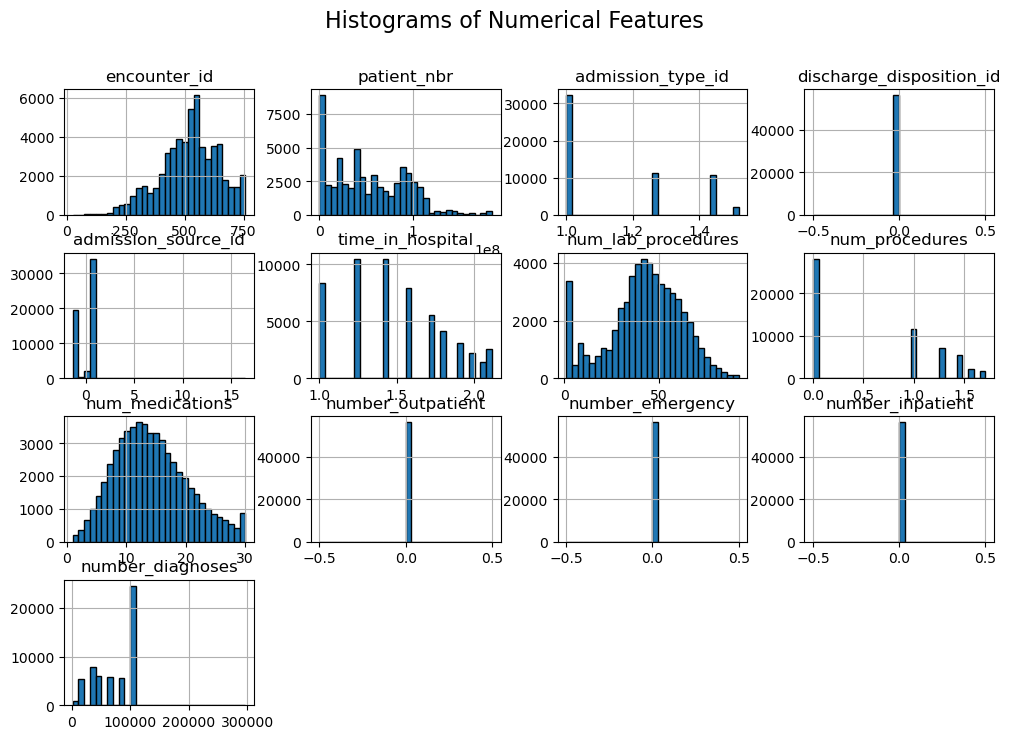

In [101]:
#plot histograms for numerical features:
df.hist(figsize=(12,8),bins=30,edgecolor='black')
plt.suptitle("Histograms of Numerical Features",fontsize=16)
plt.show()

## **Kernel Density Estimation (KDE)**

### -> Smooth representation of a variable’s probability distribution.
### -> Alternative to histograms but without bar divisions.

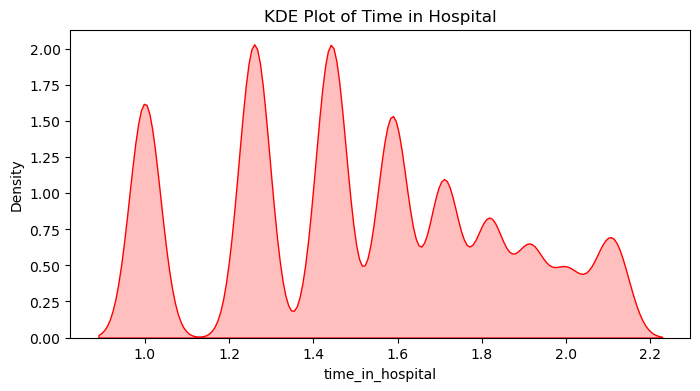

In [105]:
#KDE plot for numerical feature:
plt.figure(figsize=(8,4))
sns.kdeplot(df['time_in_hospital'],fill=True,color='red')
plt.title("KDE Plot of Time in Hospital")
plt.show()

## **Boxplot**

### -> Displays the distribution, median, quartiles, and outliers of a numerical variable.
### -> Useful for detecting skewness and outliers.

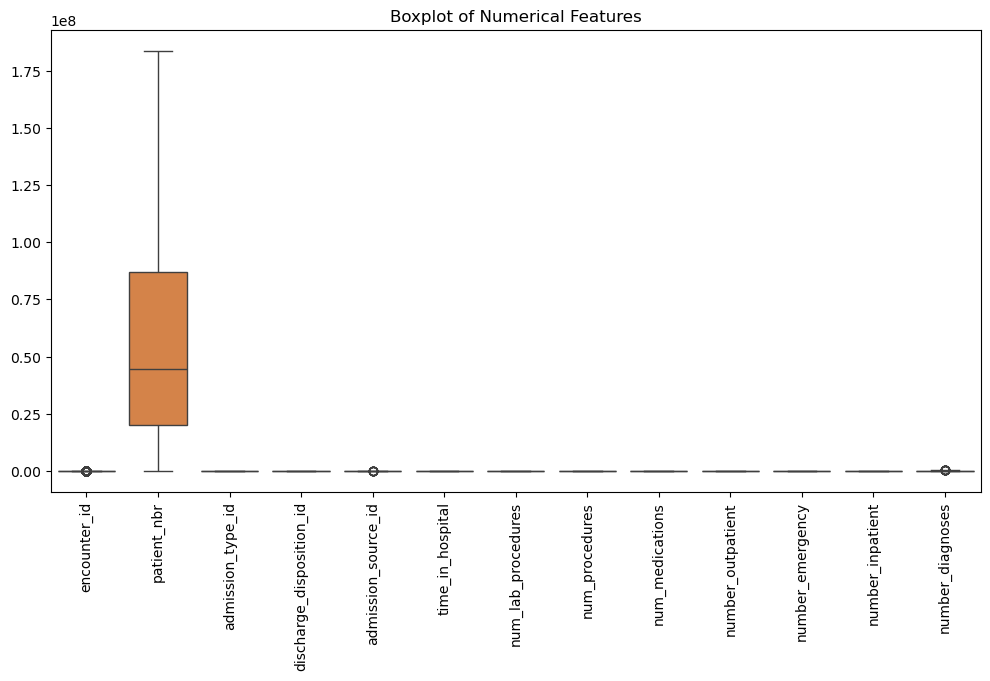

In [109]:
#boxplots for numerical columns:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)  #rotate feature names for better visibility
plt.title("Boxplot of Numerical Features")
plt.show()

## ***Relationships Between Variables (Bivariate Analysis):***

## **Pair Plot**

### -> Shows scatter plots for pairwise relationships between numerical variables.
### -> Diagonal can have histograms or KDE plots for individual variable distribution.

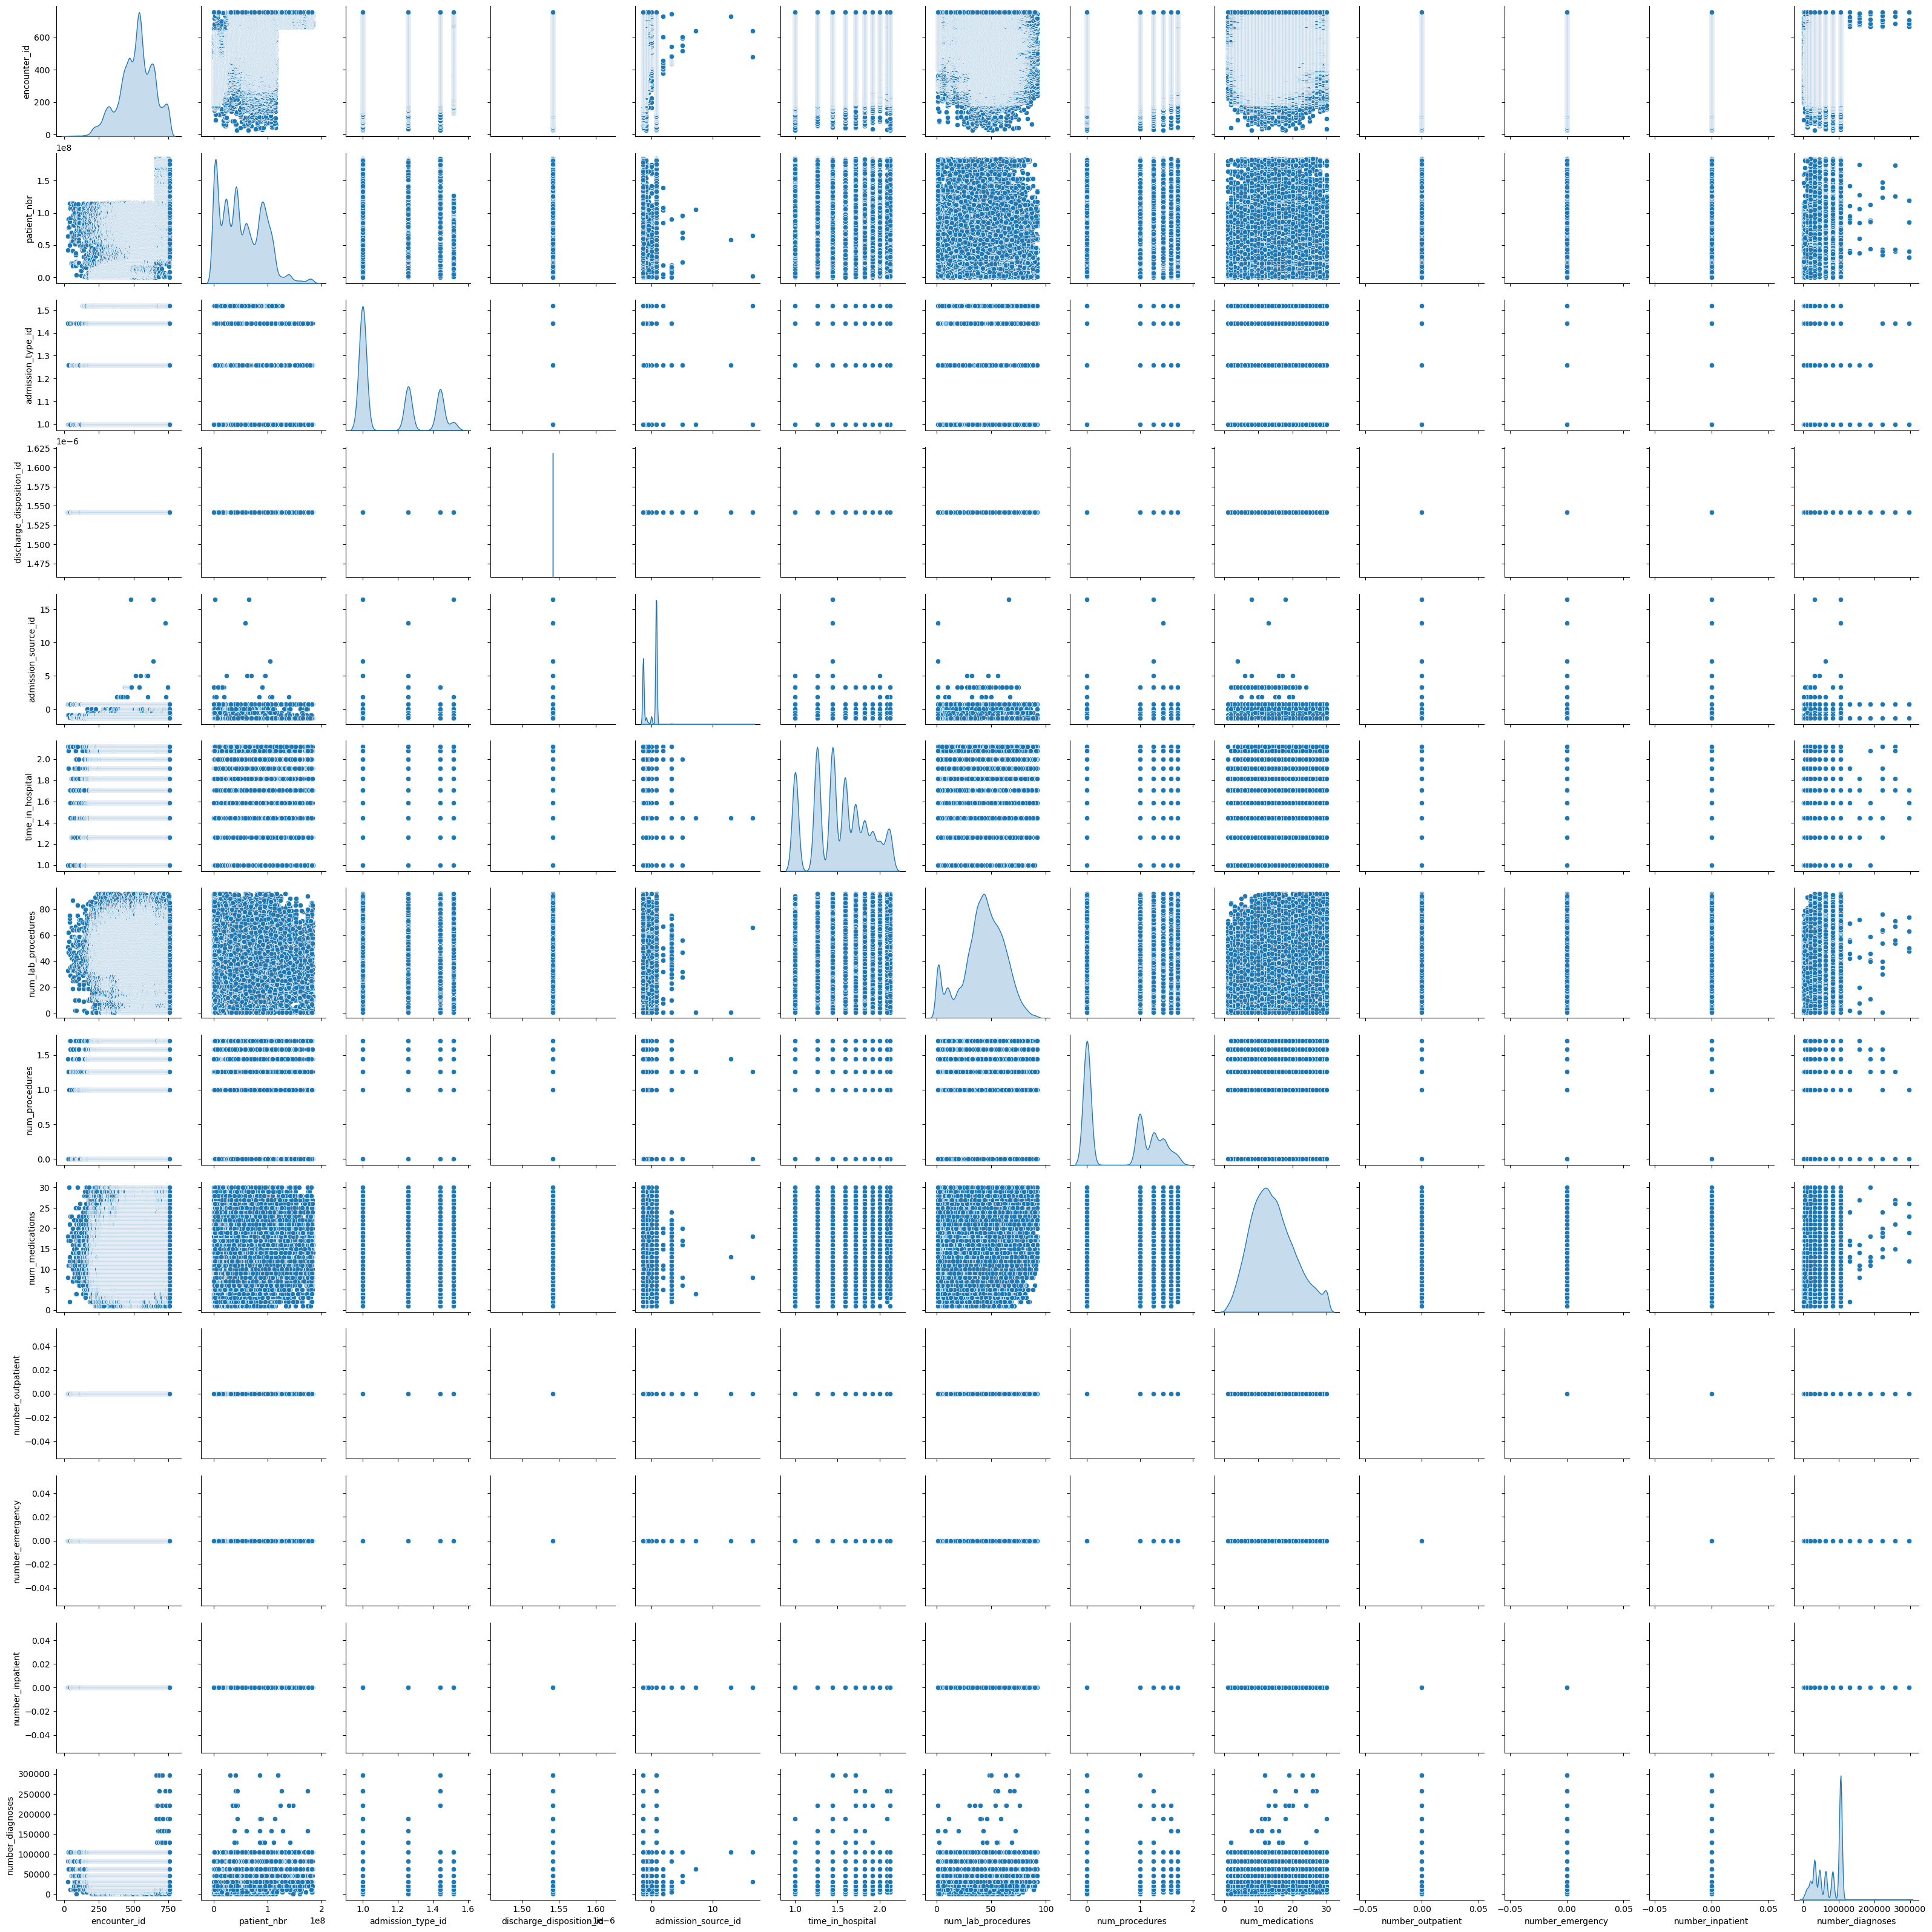

In [114]:
#pair plot for visualizing relationships:
sns.pairplot(df, diag_kind='kde')  #KDE for better visualization
plt.show()

## **Heatmap**

### -> Visualizes correlation between numerical features using a color-coded grid.
### -> Helps identify strongly related variables for feature selection.

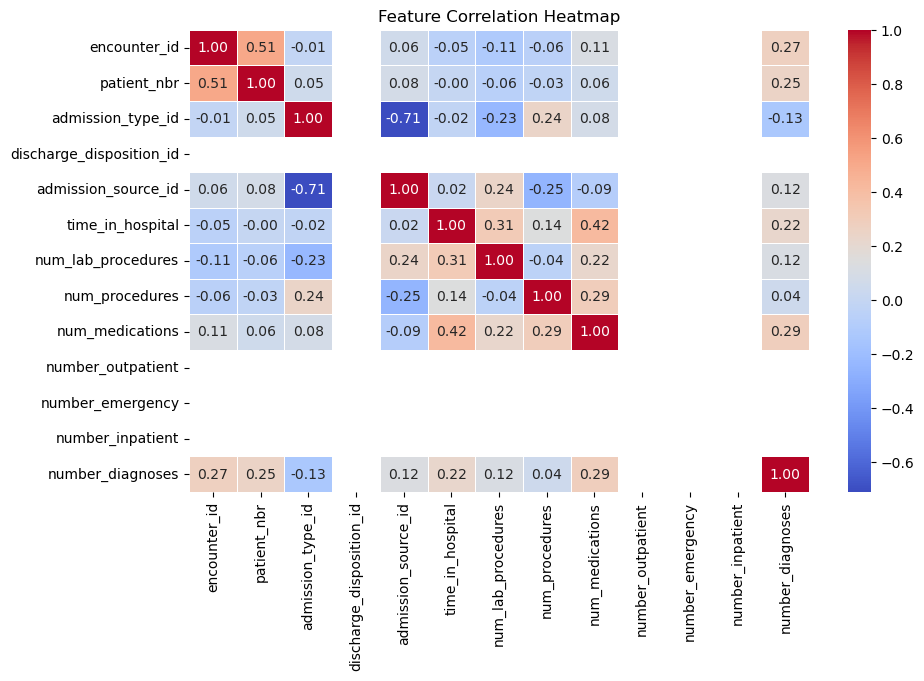

In [116]:
#computing correlation matrix:
corr_matrix=df.select_dtypes(include=['number']).corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

## **Bar Plot**

### -> Displays categorical data with bars, where the height represents frequency or values.
### -> Used for comparing categories.

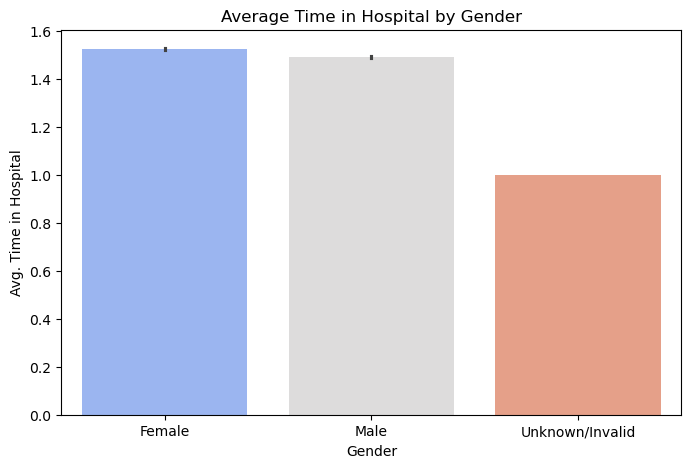

In [120]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x='gender',y='time_in_hospital',hue='gender',estimator=np.mean,palette='coolwarm')
plt.title("Average Time in Hospital by Gender")
plt.xlabel("Gender")
plt.ylabel("Avg. Time in Hospital")
plt.show()

## ***Categorical Data Analysis:***

## **Count Plot**

### -> Similar to a bar plot, but specifically counts occurrences of each categorical variable.
### -> Useful for categorical feature analysis.

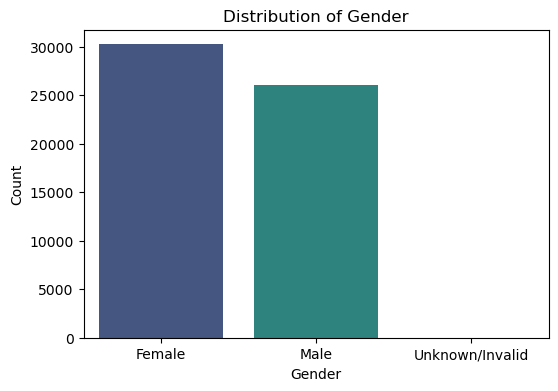

In [125]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='gender',hue='gender',palette='viridis',legend=False)
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

## **Pie Chart**

### -> Represents categorical data proportions as slices of a circle.
### -> Best for percentage-based comparisons.

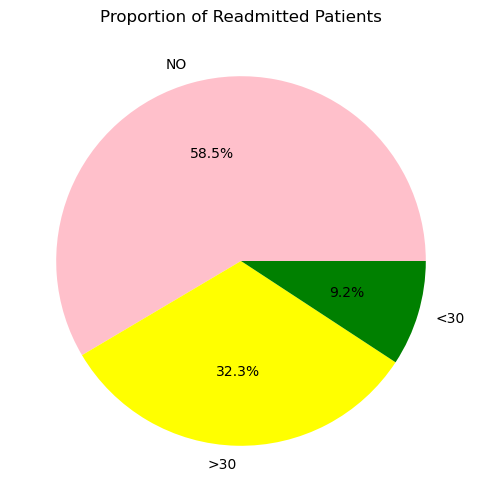

In [129]:
#categorical column: 'readmitted' (Yes/No):
df['readmitted'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(6,6),colors=['pink','yellow','green'])
plt.title("Proportion of Readmitted Patients")
plt.ylabel("")
plt.show()

## ***Identifying Trends & Patterns:***

## **Line Plot**

### -> Connects data points with lines, showing trends over time or continuous variables.
### -> Common in time series analysis.

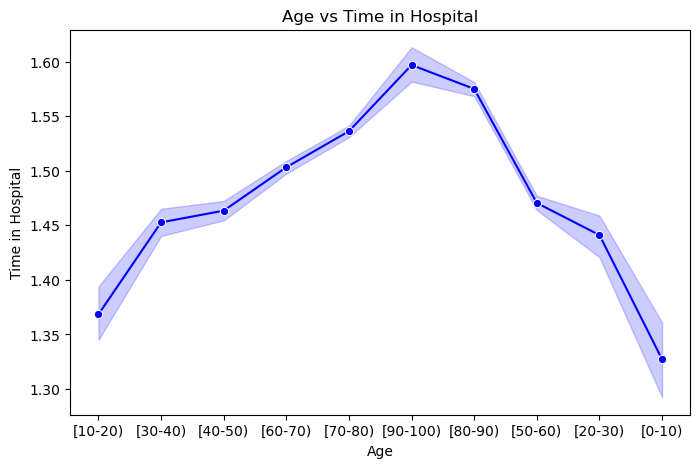

In [134]:
#plotting 'age' vs 'time_in_hospital':
plt.figure(figsize=(8,5))
sns.lineplot(x=df['age'],y=df['time_in_hospital'],marker='o',color='blue')
plt.title("Age vs Time in Hospital")
plt.xlabel("Age")
plt.ylabel("Time in Hospital")
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------

# **Feature Engineering:**

### Feature Engineering (Encoding Categorical Features) helps convert categorical variables into a numerical format, so that machine learning models can understand. 

### Different techniques are as follows:
#### ***1. Label Encoding*** - Ordered categories 
#### ***2. One-Hot Encoding*** - Small categorical sets 

### Encoding using Label Encoding:

In [141]:
from sklearn.preprocessing import LabelEncoder

#identifying categorical columns:
categorical_cols=df.select_dtypes(include=['object']).columns

#applying Label Encoding to all categorical columns:
encoder=LabelEncoder()
for col in categorical_cols:
    df[col]=encoder.fit_transform(df[col])

print(df.head())

   encounter_id  patient_nbr  race  gender  age  weight  admission_type_id  \
1     53.037117     55629189     3       0    1       1            1.00000   
3     79.389308     82442376     3       1    3       1            1.00000   
4     25.550458     42519267     3       1    4       1            1.00000   
6     38.222608     84259809     3       1    6       1            1.44225   
7     39.951608    114882984     3       1    7       1            1.00000   

   discharge_disposition_id  admission_source_id  time_in_hospital  ...  \
1                  0.000002             0.750861          1.442250  ...   
3                  0.000002             0.750861          1.259921  ...   
4                  0.000002             0.750861          1.000000  ...   
6                  0.000002            -1.254289          1.587401  ...   
7                  0.000002             0.750861          1.709976  ...   

   citoglipton  insulin  glyburide-metformin  glipizide-metformin  \
1          

# **Feature Selection:**

### Feature Selection is picking the most important features. Before training a model, it's important to select the most relevant features.

In [145]:
#selecting only numeric columns:
numerical_data=df.select_dtypes(include=['float64','int64'])

#calculating correlation matrix:
correlation_matrix=numerical_data.corr()

correlation_matrix

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
encounter_id,1.000000,0.506628,-0.014991,NaN,0.062284,-0.052688,-0.110619,-0.060530,0.113224,NaN,NaN,NaN,0.273405
patient_nbr,0.506628,1.000000,0.051335,NaN,0.077586,-0.000382,-0.063556,-0.025731,0.056768,NaN,NaN,NaN,0.248217
admission_type_id,-0.014991,0.051335,1.000000,NaN,-0.712112,-0.019580,-0.231616,0.243989,0.081839,NaN,NaN,NaN,-0.130422
discharge_disposition_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_source_id,0.062284,0.077586,-0.712112,NaN,1.000000,0.022883,0.240358,-0.251967,-0.089168,NaN,NaN,NaN,0.124021
time_in_hospital,-0.052688,-0.000382,-0.019580,NaN,0.022883,1.000000,0.314400,0.141103,0.416277,NaN,NaN,NaN,0.221919
num_lab_procedures,-0.110619,-0.063556,-0.231616,NaN,0.240358,0.314400,1.000000,-0.044928,0.219520,NaN,NaN,NaN,0.115148
num_procedures,-0.060530,-0.025731,0.243989,NaN,-0.251967,0.141103,-0.044928,1.000000,0.292908,NaN,NaN,NaN,0.044257
num_medications,0.113224,0.056768,0.081839,NaN,-0.089168,0.416277,0.219520,0.292908,1.000000,NaN,NaN,NaN,0.287689
number_outpatient,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


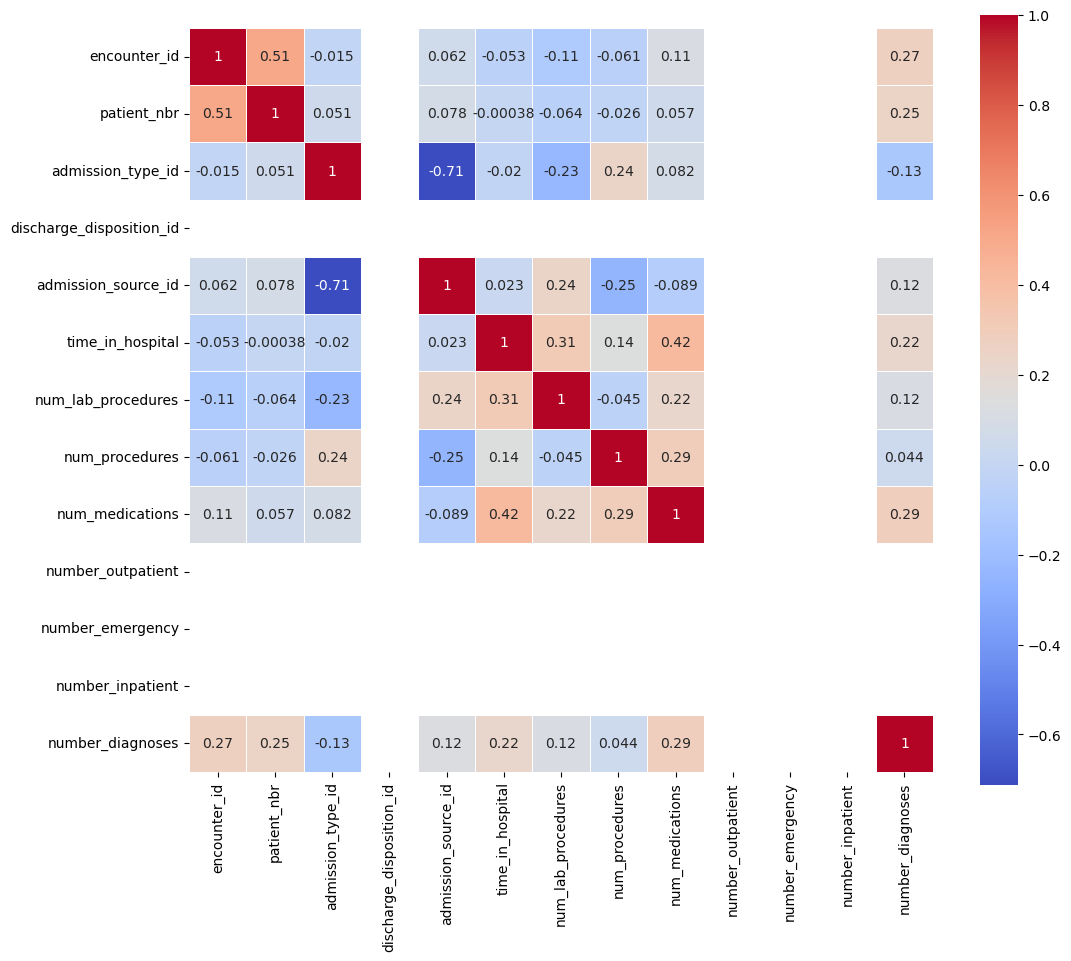

In [147]:
plt.figure(figsize=(12,10)) #adjusting figure size as needed
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',square=True,linewidth=.5,annot_kws={"size":10})
plt.show()

### **SelectKbest-Fiter Method:**

In [150]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif

#identifying categorical and numerical columns correctly:
cat_cols=df.select_dtypes(include=['int','int64']).columns  #encoded categorical features
num_cols=df.select_dtypes(include=['float','float64']).columns  #numerical features
y=df['readmitted']  #target variable

#filtering of constant columns:
X_cat=df[cat_cols].loc[:,df[cat_cols].nunique()>1]
X_num=df[num_cols].loc[:,df[num_cols].nunique()>1]

#scaling numerical features for ANOVA:
X_num_scaled=StandardScaler().fit_transform(X_num)

#setting k value (limited to available features):
k=8
k_cat=min(k,X_cat.shape[1])
k_num=min(k,X_num.shape[1])

#applying Chi-Squared for categorical features:
chi_selector=SelectKBest(chi2,k=k_cat)
chi_selected=chi_selector.fit(X_cat,y).get_support()
selected_cat_features=list(X_cat.columns[chi_selected])

#applying ANOVA F-test for numerical features:
anova_selector=SelectKBest(f_classif,k=k_num)
anova_selected=anova_selector.fit(X_num_scaled,y).get_support()
selected_num_features=list(X_num.columns[anova_selected])

# Print selected features
print("Selected Categorical Features:",selected_cat_features)
print("Selected Numerical Features:",selected_num_features)

Selected Categorical Features: ['patient_nbr', 'age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'change', 'readmitted']
Selected Numerical Features: ['encounter_id', 'admission_type_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses']


# **Split Data into Training and Testing Sets:**

In [153]:
from sklearn.model_selection import train_test_split

#splitting data into training and testing sets (80% train, 20% test):
X=df.drop(columns=['readmitted'])  #features(everything except the target)
y=df['readmitted']  #target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#printing the shape of train and test sets:
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)

Training Set Shape: (45015, 47) (45015,)
Testing Set Shape: (11254, 47) (11254,)


# **Feature Scaling:**

In [156]:
#  Standardize the data (important for SelectKBest)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [158]:
from sklearn.ensemble import RandomForestClassifier

#feature Importance using Random Forest:
rmf = RandomForestClassifier(n_estimators=100,random_state=42)
rmf.fit(X_scaled,y)
feature_importances=pd.Series(rmf.feature_importances_,index=X.columns).sort_values(ascending=False)
print(feature_importances)

encounter_id                1.051048e-01
patient_nbr                 1.048291e-01
num_lab_procedures          7.898890e-02
diag_1                      7.857318e-02
diag_2                      7.559746e-02
diag_3                      7.372642e-02
num_medications             6.939979e-02
time_in_hospital            4.887276e-02
age                         4.317058e-02
number_diagnoses            3.703807e-02
medical_specialty           3.621470e-02
payer_code                  3.248677e-02
num_procedures              3.205976e-02
insulin                     2.412485e-02
race                        2.073939e-02
admission_type_id           1.992963e-02
gender                      1.670105e-02
admission_source_id         1.543777e-02
metformin                   1.305000e-02
glipizide                   1.191593e-02
change                      1.135149e-02
glyburide                   1.024768e-02
diabetesMed                 8.024559e-03
pioglitazone                7.604877e-03
rosiglitazone   

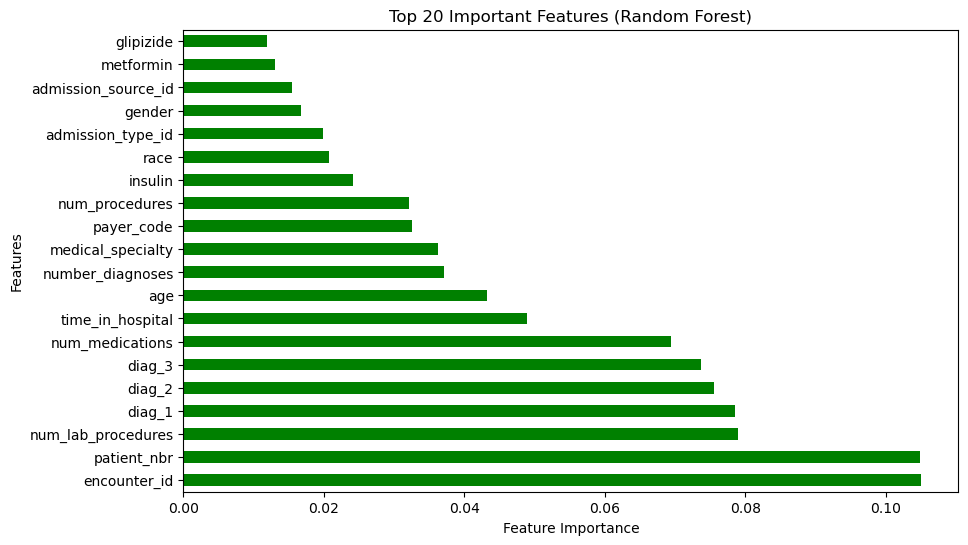

In [159]:
import matplotlib.pyplot as plt

#plot feature importances:
feature_importances.head(20).plot(kind='barh', figsize=(10, 6), color='green')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 20 Important Features (Random Forest)")
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------